In [235]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [236]:
df_web_data = pd.read_csv('https://raw.githubusercontent.com/GemaVNZ/vanguard-ab-test/refs/heads/main/CSV/df_web_data_combinado.csv')
df_experiment_clients = pd.read_csv('https://raw.githubusercontent.com/GemaVNZ/vanguard-ab-test/refs/heads/main/CSV/df_final_experiment_clients.csv')
df_demo = pd.read_csv('https://raw.githubusercontent.com/GemaVNZ/vanguard-ab-test/refs/heads/main/CSV/df_final_demo.csv')

In [237]:
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [238]:
unique_variation = df_web_data['process_step'].unique()

unique_variation

array(['step_3', 'step_2', 'step_1', 'start', 'confirm'], dtype=object)

In [239]:
# para poder filtrar mejor ya que hay varias id repetidas: start = 0, step_1 = 1, step_2 = 2, step_3 = 3, confirm = 4

df_web_data['process_step'] = df_web_data['process_step'].replace({'start': 0, 'step_1': 1,'step_2': 2, 'step_3': 3, 'confirm': 4})



/var/folders/8k/8w_q7kd116v1zrzns3x24cv80000gn/T/ipykernel_8190/3214087278.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_web_data['process_step'] = df_web_data['process_step'].replace({'start': 0, 'step_1': 1,'step_2': 2, 'step_3': 3, 'confirm': 4})


In [240]:
df_web_data = df_web_data.drop(columns=['visitor_id', 'visit_id', 'date_time'])

df_web_data = df_web_data.drop_duplicates()

df_web_data

,client_id,process_step
0,9988021,3
1,9988021,2
6,9988021,1
7,9988021,0
8,8320017,4
...,...,...
755385,9668240,3
755386,9668240,2
755389,9668240,1
755392,9668240,0


In [241]:
df_max_process_step = df_web_data.loc[df_web_data.groupby('client_id')['process_step'].idxmax()]

df_max_process_step

,client_id,process_step
285511,169,4
628331,336,0
442853,546,4
72014,555,4
138176,647,4
...,...,...
471736,9999729,4
403801,9999768,4
356798,9999832,1
274431,9999839,4


In [242]:
# Unimos df_experiment_clients con df_demo y con df_web_data

df_unido = pd.merge(df_demo, df_experiment_clients, on='client_id')

df_total = pd.merge(df_unido, df_max_process_step, on='client_id')

df_total

#df_unido

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,process_step
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,4
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,4
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test,3
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test,0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control,0
...,...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN,4
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN,4
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN,4
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN,1


In [243]:
# Borramos donde no hay info de si es Test o Control

df_test_control = df_total.dropna(subset=['Variation'])

df_test_control

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,process_step
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,4
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,4
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test,3
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test,0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control,0
...,...,...,...,...,...,...,...,...,...,...,...
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test,4
50496,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control,4
50497,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test,4
50498,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test,4


In [244]:
# Ahora vamos a separar dataframes los de test y los de control

df_test = df_test_control[df_test_control['Variation'] == 'Test']

df_control = df_test_control[df_test_control['Variation'] == 'Control']

In [245]:
df_test

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,process_step
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,4
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test,3
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test,0
7,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0,Test,4
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0,Test,4
...,...,...,...,...,...,...,...,...,...,...,...
50492,501496,23.0,281.0,35.0,F,2.0,32529.34,0.0,3.0,Test,4
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test,4
50497,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test,4
50498,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test,4


/var/folders/8k/8w_q7kd116v1zrzns3x24cv80000gn/T/ipykernel_8190/3717888777.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gendr', y='clnt_age', data=df_test, palette='Set1')


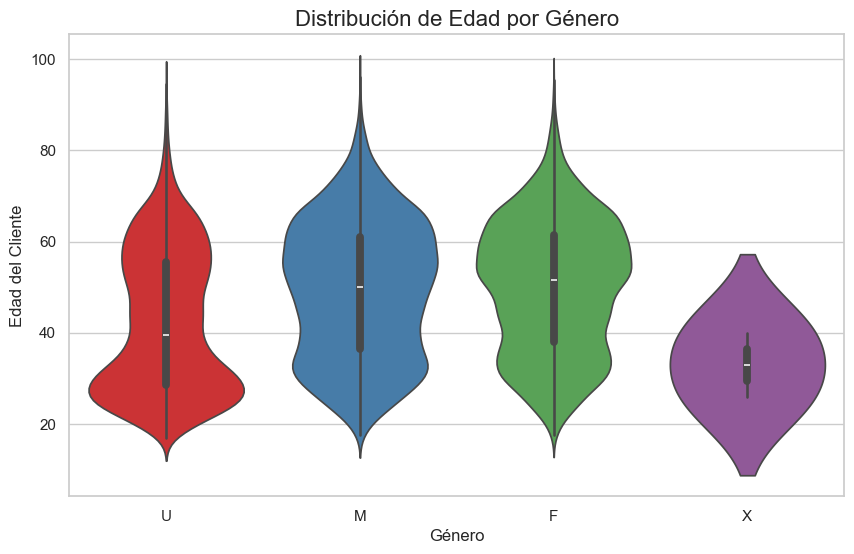

In [254]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='gendr', y='clnt_age', data=df_test, palette='Set1')
plt.title('Distribución de Edad por Género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Edad del Cliente', fontsize=12)
plt.show()
